In [50]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [51]:
tempo_final = 100 #segundos
Δt = 0.001
n = tempo_final/Δt
L = 10
D = .835 # coeficiente de difusão
Δx = 1
k = D*Δt/Δx**2
xx = np.arange(0,L,Δx) # acho que isso não é necessário x = L/Δx.Isso é a malha espacial
tt = np.arange(0,tempo_final,Δt) # acho que isso não é necessário t = T/Δt. Isso é a malha temporal
 

In [52]:
#condição inicial u(x,0) = f(x)

u = np.zeros((len(tt),len(xx)))
f = lambda x: 0

for x in range(len(xx)):
    u[0,x] = f(x+1)
u


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [53]:
# condição de contorno u(0,t) = a(t) e u(L,t) = b(t)
a = lambda t: 100
b = lambda t: 50

# Calcular a edp
for t in range(len(tt)-1) :
    for x in range(len(xx)):
        if x == 0:
            termo_anterior = a(t)
            termo_posterior = u[t,x+1]
        elif x + 1 == len(xx):
            termo_anterior = u[t,x-1]
            termo_posterior = b(t)
        else:
            termo_anterior = u[t,x-1]
            termo_posterior = u[t,x+1]
        
        u[t+1,x] = k*(termo_posterior + termo_anterior) + u[t,x]*(1-2*k)
u

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [2.08750000e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.04375000e-03],
       [4.17491285e-03, 4.35765625e-08, 0.00000000e+00, 2.17882812e-08,
        2.08745642e-03],
       ...,
       [9.14930233e+01, 8.30325742e+01, 7.46527133e+01, 6.63659075e+01,
        5.81596900e+01],
       [9.14930243e+01, 8.30325759e+01, 7.46527152e+01, 6.63659092e+01,
        5.81596910e+01],
       [9.14930252e+01, 8.30325776e+01, 7.46527172e+01, 6.63659109e+01,
        5.81596919e+01]])

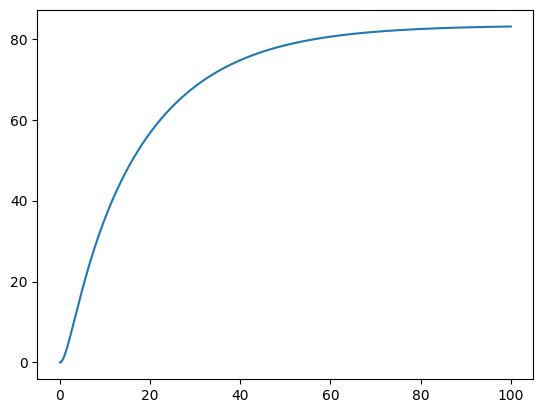

In [54]:
plt.plot(tt,u[:,1])

In [55]:
# incremento = u.shape[0]/5000 # número de imagem que vai ser gerado
# numero_imagem = 1

# for i in range(0,u.shape[0],int(np.floor(incremento))):

#     plt.plot(xx,u[i,:])
#     plt.xlabel('Comprimento da barra (m)')
#     plt.ylabel("densidade de calor")
#     plt.ylim(0,np.max(u))
#     plt.xlim(0,L)
#     plt.savefig(f'imagens/imagem{numero_imagem}.png')
#     numero_imagem += 1
#     plt.cla()

tentar fazer a animação usando o pillow

In [56]:
# # Caminho para a pasta com as imagens
# folder_path = 'imagens/'

# # Obter a lista de nomes de arquivos de imagem
# image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.png')]

# # Função para extrair o número do nome do arquivo
# def extract_number(filename):
#     # Remover o prefixo e a extensão do nome do arquivo
#     basename = os.path.basename(filename)
#     number = basename.replace('imagem', '').replace('.png', '')
#     # Converter para inteiro e retornar
#     return int(number)

# # Ordenar a lista de nomes de arquivos em ordem numérica
# image_files.sort(key=extract_number)

# # Criar a lista de objetos Image
# images = [Image.open(image) for image in image_files]

# # Salvar como GIF animado
# images[0].save('animation.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

# for file in image_files:
#     os.remove(file)